<a href="https://colab.research.google.com/github/PrithiviRajMK/ScalerProjects/blob/main/OLA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objective
### Apollo wants to know, 
*   which variables are significant in predicting the reason for hospitalization for different regions
*   how well some variables like viral load, smoking, severity level describe the hospitalization charges

#### Import Packages

In [1]:
# Import required packages
import warnings
warnings.filterwarnings('ignore')

# Data Preprocessing Libs
import pandas as pd #data processing using DataFrames
import numpy as np #Numrical calculations
from sklearn.preprocessing import LabelEncoder, StandardScaler 
#Plotting Libs
import matplotlib.pyplot as plt # plotting
import seaborn as sns # plotting
import plotly.express as px # plotting
#Statistics Libs
from scipy.stats import binom, poisson,expon # For Probability Distribution.
import plotly.figure_factory as ff # distplot 
from scipy.stats import ttest_ind, f_oneway, kruskal # numeric Vs catogerical
from scipy.stats import chi2_contingency
import scipy.stats as st# categorical Vs categorical
from datetime import datetime
from scipy.stats import pearsonr, spearmanr # numeric Vs numeric

from scipy.stats import kstest,levene,norm,shapiro # cdf
from statsmodels.graphics.gofplots import qqplot_2samples, qqplot

from statsmodels.distributions.empirical_distribution import ECDF
# Prec


#### Import & Load data

In [17]:
df = pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/002/492/original/ola_driver_scaler.csv")

# Statistical Summary

### Meta-data of dataset

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            19104 non-null  int64  
 1   MMM-YY                19104 non-null  object 
 2   Driver_ID             19104 non-null  int64  
 3   Age                   19043 non-null  float64
 4   Gender                19052 non-null  float64
 5   City                  19104 non-null  object 
 6   Education_Level       19104 non-null  int64  
 7   Income                19104 non-null  int64  
 8   Dateofjoining         19104 non-null  object 
 9   LastWorkingDate       1616 non-null   object 
 10  Joining Designation   19104 non-null  int64  
 11  Grade                 19104 non-null  int64  
 12  Total Business Value  19104 non-null  int64  
 13  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 2.0+ MB


In [19]:
df.drop('Unnamed: 0', axis=1, inplace=True)

### Description of the dataframe

In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Driver_ID,19104.0,1415.591133,8.107053e+02,1.0,710.0,1417.0,2137.0,2788.0
Age,19043.0,34.668435,6.257912e+00,21.0,30.0,34.0,39.0,58.0
Gender,19052.0,0.418749,4.933670e-01,0.0,0.0,0.0,1.0,1.0
Education_Level,19104.0,1.021671,8.001671e-01,0.0,0.0,1.0,2.0,2.0
Income,19104.0,65652.025126,3.091452e+04,10747.0,42383.0,60087.0,83969.0,188418.0
Joining Designation,19104.0,1.690536,8.369837e-01,1.0,1.0,1.0,2.0,5.0
Grade,19104.0,2.252670,1.026512e+00,1.0,1.0,2.0,3.0,5.0
Total Business Value,19104.0,571662.074958,1.128312e+06,-6000000.0,0.0,250000.0,699700.0,33747720.0
Quarterly Rating,19104.0,2.008899,1.009832e+00,1.0,1.0,2.0,3.0,4.0


In [21]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
MMM-YY,19104,24,01/01/19,1022,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Driver_ID,19104.0,NaN,NaN,NaN,1415.591133,810.705321,1.0,710.0,1417.0,2137.0,2788.0
Age,19043.0,NaN,NaN,NaN,34.668435,6.257912,21.0,30.0,34.0,39.0,58.0
Gender,19052.0,NaN,NaN,NaN,0.418749,0.493367,0.0,0.0,0.0,1.0,1.0
City,19104,29,C20,1008,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education_Level,19104.0,NaN,NaN,NaN,1.021671,0.800167,0.0,0.0,1.0,2.0,2.0
Income,19104.0,NaN,NaN,NaN,65652.025126,30914.515344,10747.0,42383.0,60087.0,83969.0,188418.0
Dateofjoining,19104,869,23/07/15,192,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LastWorkingDate,1616,493,29/07/20,70,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Joining Designation,19104.0,NaN,NaN,NaN,1.690536,0.836984,1.0,1.0,1.0,2.0,5.0


In [22]:
# only object type columns
df.describe(include='object')

,MMM-YY,City,Dateofjoining,LastWorkingDate
count,19104,19104,19104,1616
unique,24,29,869,493
top,01/01/19,C20,23/07/15,29/07/20
freq,1022,1008,192,70


In [23]:
df.head()

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


### Shape of the data

In [24]:
### Data shape
print("Ola dataset has {} rows and {} columns.".format(df.shape[0], df.shape[1]))

Ola dataset has 19104 rows and 13 columns.


### Size & Count

In [25]:
# total number of elements/records 
df.size

248352

### Column Names

In [26]:
# Columna names
df.columns

Index(['MMM-YY', 'Driver_ID', 'Age', 'Gender', 'City', 'Education_Level',
       'Income', 'Dateofjoining', 'LastWorkingDate', 'Joining Designation',
       'Grade', 'Total Business Value', 'Quarterly Rating'],
      dtype='object')

### Column data typess

In [27]:
### Data type of all attributes
df.dtypes

MMM-YY                   object
Driver_ID                 int64
Age                     float64
Gender                  float64
City                     object
Education_Level           int64
Income                    int64
Dateofjoining            object
LastWorkingDate          object
Joining Designation       int64
Grade                     int64
Total Business Value      int64
Quarterly Rating          int64
dtype: object

# Data Pre-processing

### Check for Missing Values

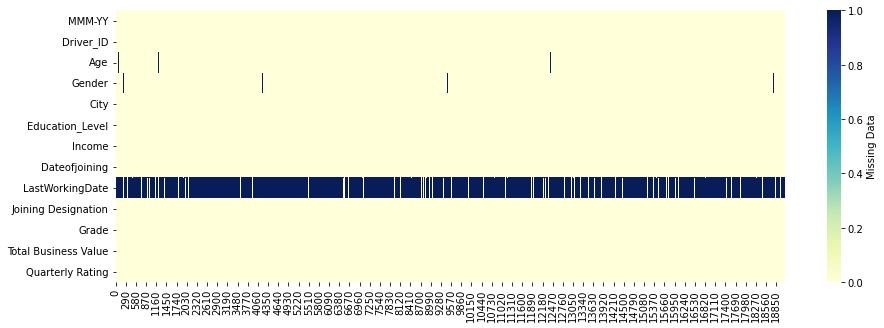

In [28]:
plt.figure(figsize=(15,5))
sns.heatmap(df.isna().transpose(),
            cmap="YlGnBu",
           cbar_kws={'label': 'Missing Data'})

In [29]:
# Missing Values
null_values= pd.DataFrame({"Null Values" : df.isna().sum(),
                           "Percentage Null Value": (df.isna().sum()/(df.shape[0])*(100))})
null_values

,Null Values,Percentage Null Value
MMM-YY,0,0.000000
Driver_ID,0,0.000000
Age,61,0.319305
Gender,52,0.272194
City,0,0.000000
Education_Level,0,0.000000
Income,0,0.000000
Dateofjoining,0,0.000000
LastWorkingDate,17488,91.541039
Joining Designation,0,0.000000


In [30]:
# Imputing missing values of 'emp_title' with 'unknown_Emp_title'
df['LastWorkingDate'].fillna('00/00/00', inplace=True)

In [31]:
from sklearn.impute import KNNImputer
def imputeKNN(cols):
  imputer = KNNImputer(n_neighbors=2)
  age=imputer.fit_transform(df[[cols]])
  nparr=np.array(age)
  df[cols] = pd.DataFrame(nparr)

missCols=['Age','Gender']
for cols in missCols:
  imputeKNN(cols)  

In [32]:
# Missing Values
null_values= pd.DataFrame({"Null Values" : df.isna().sum(),
                           "Percentage Null Value": (df.isna().sum()/(df.shape[0])*(100))})
null_values

,Null Values,Percentage Null Value
MMM-YY,0,0.0
Driver_ID,0,0.0
Age,0,0.0
Gender,0,0.0
City,0,0.0
Education_Level,0,0.0
Income,0,0.0
Dateofjoining,0,0.0
LastWorkingDate,0,0.0
Joining Designation,0,0.0


In [33]:
df[["DOJ_day", "DOJ_month", "DOJ_year"]] = df["Dateofjoining"].str.split("/", expand = True)
df.head()

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,DOJ_day,DOJ_month,DOJ_year
0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,00/00/00,1,1,2381060,2,24,12,18
1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,00/00/00,1,1,-665480,2,24,12,18
2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2,24,12,18
3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,00/00/00,2,2,0,1,11,06,20
4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,00/00/00,2,2,0,1,11,06,20


In [34]:
df[["LWD_day", "LWD_month", "LWD_year"]] = df["LastWorkingDate"].str.split("/", expand = True)
df.head()

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,DOJ_day,DOJ_month,DOJ_year,LWD_day,LWD_month,LWD_year
0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,00/00/00,1,1,2381060,2,24,12,18,00,00,00
1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,00/00/00,1,1,-665480,2,24,12,18,00,00,00
2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2,24,12,18,03,11,19
3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,00/00/00,2,2,0,1,11,06,20,00,00,00
4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,00/00/00,2,2,0,1,11,06,20,00,00,00


In [35]:
df[["Rep_day", "Rep_month", "Rep_year"]] = df["MMM-YY"].str.split("/", expand = True)
df.head()

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,...,Quarterly Rating,DOJ_day,DOJ_month,DOJ_year,LWD_day,LWD_month,LWD_year,Rep_day,Rep_month,Rep_year
0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,00/00/00,1,...,2,24,12,18,00,00,00,01,01,19
1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,00/00/00,1,...,2,24,12,18,00,00,00,02,01,19
2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,...,2,24,12,18,03,11,19,03,01,19
3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,00/00/00,2,...,1,11,06,20,00,00,00,11,01,20
4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,00/00/00,2,...,1,11,06,20,00,00,00,12,01,20


#### **Observation**: *There is no missing value in the given dataset for any attribute*

### Check for duplicates

In [36]:
# duplicates
df.duplicated().sum()

0

#### **Observation**: *There is no duplicate value in the given dataset*

In [37]:
df.head()

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,...,Quarterly Rating,DOJ_day,DOJ_month,DOJ_year,LWD_day,LWD_month,LWD_year,Rep_day,Rep_month,Rep_year
0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,00/00/00,1,...,2,24,12,18,00,00,00,01,01,19
1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,00/00/00,1,...,2,24,12,18,00,00,00,02,01,19
2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,...,2,24,12,18,03,11,19,03,01,19
3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,00/00/00,2,...,1,11,06,20,00,00,00,11,01,20
4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,00/00/00,2,...,1,11,06,20,00,00,00,12,01,20


### Dataset Copy

In [38]:
# Take a working copy of the given dataset
work_df = df.copy()

### Delete irrelevant columns

In [39]:
work_df.shape

(19104, 22)

### Data categories

In [40]:
# categorical_features=list(work_df.select_dtypes('object').columns)
cat_features = [x for x in work_df.columns if work_df[x].dtype == 'object']
cat_features

['MMM-YY',
 'City',
 'Dateofjoining',
 'LastWorkingDate',
 'DOJ_day',
 'DOJ_month',
 'DOJ_year',
 'LWD_day',
 'LWD_month',
 'LWD_year',
 'Rep_day',
 'Rep_month',
 'Rep_year']

In [41]:
num_features = [y for y in work_df.columns if work_df[y].dtype not in ('object', 'datetime64[ns')]
num_features

['Driver_ID',
 'Age',
 'Gender',
 'Education_Level',
 'Income',
 'Joining Designation',
 'Grade',
 'Total Business Value',
 'Quarterly Rating']

# Exploratory Data Analysis (EDA)

### Non-Graphical Analysis

#### Unique value counts of all attributes

#### Value Counts

In [43]:
for col in work_df.columns:
    print(f"-----------------{col}------------------")
    attribute_cnt = {f'{col} Count' : work_df[col].value_counts()}
    attribute_cnt = pd.DataFrame(attribute_cnt)
    print(attribute_cnt)
    print("\n")

-----------------MMM-YY------------------
          MMM-YY Count
01/01/19          1022
02/01/19           944
03/01/19           870
12/01/20           819
10/01/20           818
08/01/20           812
09/01/20           809
07/01/20           806
11/01/20           805
12/01/19           795
04/01/19           794
01/01/20           782
11/01/19           781
06/01/20           770
05/01/20           766
05/01/19           764
09/01/19           762
02/01/20           761
07/01/19           757
08/01/19           754
10/01/19           739
04/01/20           729
06/01/19           726
03/01/20           719


-----------------Driver_ID------------------
      Driver_ID Count
2110               24
2617               24
1623               24
1642               24
1644               24
...               ...
1614                1
445                 1
2397                1
1619                1
469                 1

[2381 rows x 1 columns]


-----------------Age------------------
      

In [44]:
# Number of unique records for each columns
work_df.nunique()

MMM-YY                     24
Driver_ID                2381
Age                        37
Gender                      3
City                       29
Education_Level             3
Income                   2383
Dateofjoining             869
LastWorkingDate           494
Joining Designation         5
Grade                       5
Total Business Value    10181
Quarterly Rating            4
DOJ_day                    31
DOJ_month                  12
DOJ_year                    8
LWD_day                    32
LWD_month                  13
LWD_year                    4
Rep_day                    12
Rep_month                   1
Rep_year                    2
dtype: int64

In [46]:
subset_df = work_df.iloc[:,[3,5,9,10,12,13,14,15,16,17,18,19,20,21]]
subset_df

,Gender,Education_Level,Joining Designation,Grade,Quarterly Rating,DOJ_day,DOJ_month,DOJ_year,LWD_day,LWD_month,LWD_year,Rep_day,Rep_month,Rep_year
0,0.0,2,1,1,2,24,12,18,00,00,00,01,01,19
1,0.0,2,1,1,2,24,12,18,00,00,00,02,01,19
2,0.0,2,1,1,2,24,12,18,03,11,19,03,01,19
3,0.0,2,2,2,1,11,06,20,00,00,00,11,01,20
4,0.0,2,2,2,1,11,06,20,00,00,00,12,01,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,0.0,2,2,2,3,06,08,20,00,00,00,08,01,20
19100,0.0,2,2,2,3,06,08,20,00,00,00,09,01,20
19101,0.0,2,2,2,2,06,08,20,00,00,00,10,01,20
19102,0.0,2,2,2,2,06,08,20,00,00,00,11,01,20


#### Value Counts

In [47]:
# Value counts of certain attributes
for col in subset_df.columns:
  if len(subset_df[col].unique())<10:
    print(f"Column is: {col} and Values are:")
    print(subset_df[col].unique())
    print()

Column is: Gender and Values are:
[0.         1.         0.41874869]

Column is: Education_Level and Values are:
[2 0 1]

Column is: Joining Designation and Values are:
[1 2 3 4 5]

Column is: Grade and Values are:
[1 2 3 4 5]

Column is: Quarterly Rating and Values are:
[2 1 4 3]

Column is: DOJ_year and Values are:
['18' '20' '19' '15' '17' '16' '13' '14']

Column is: LWD_year and Values are:
['00' '19' '20' '18']

Column is: Rep_month and Values are:
['01']

Column is: Rep_year and Values are:
['19' '20']



### Graphical Analysis

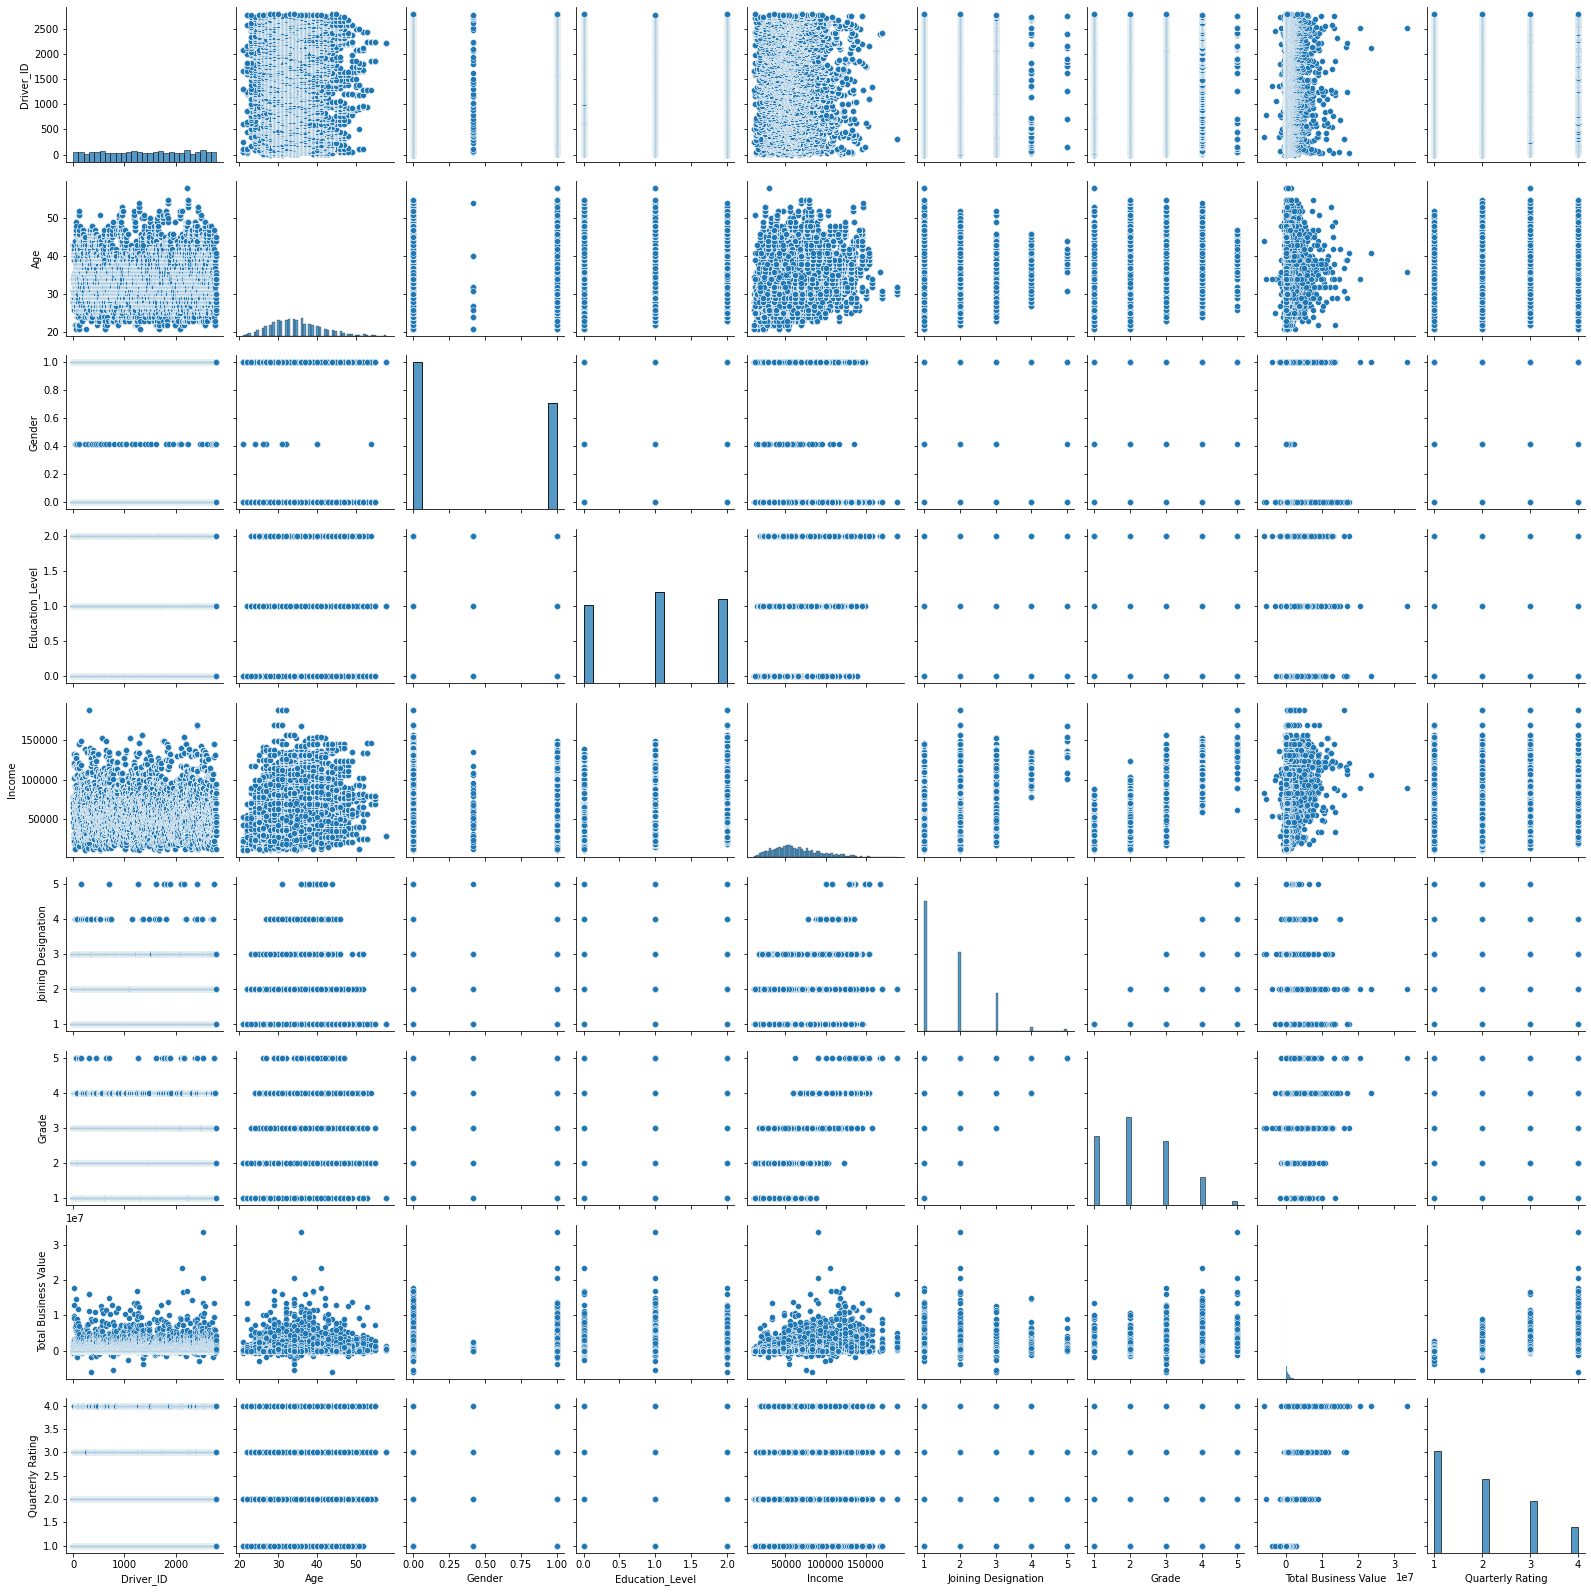

In [48]:
sns.pairplot(work_df)

#### Univariate Analysis

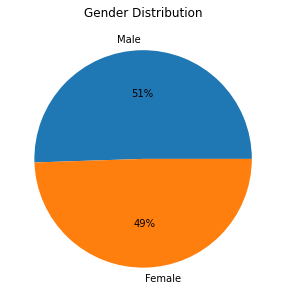

In [ ]:
plt.figure(figsize=(15,5))
plt.pie(work_df['sex'].value_counts(),labels=['Male','Female'], autopct='%.0f%%')
plt.title('Gender Distribution')
plt.show()

#### **Observation**: *Gender distribution amongst patients is almost same*

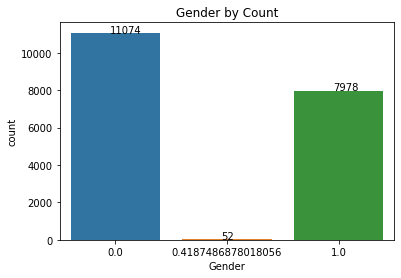

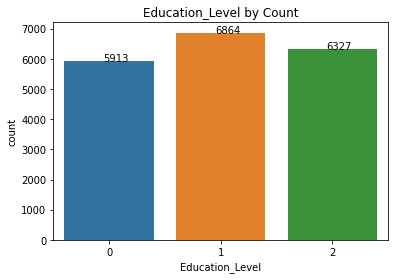

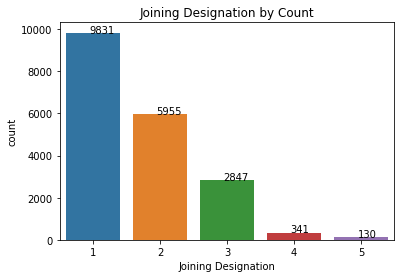

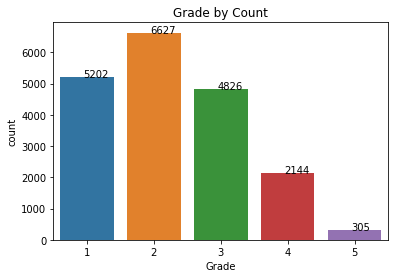

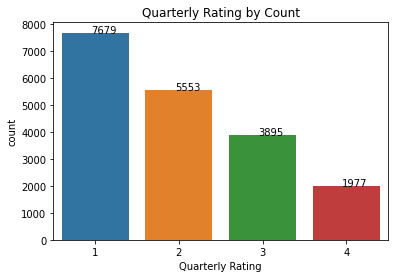

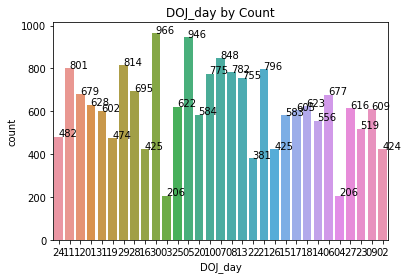

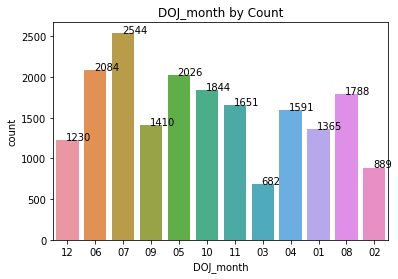

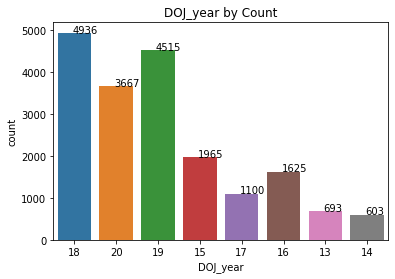

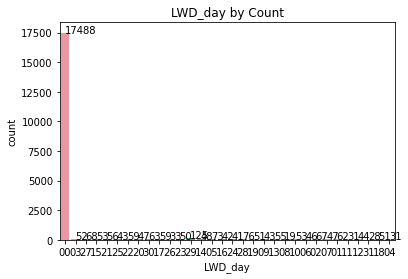

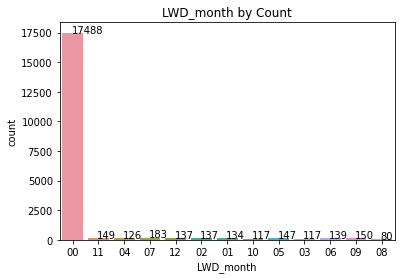

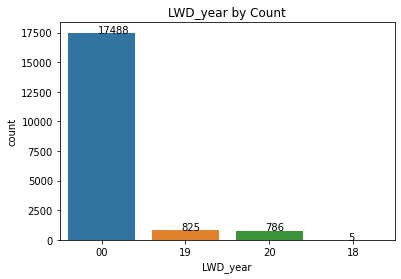

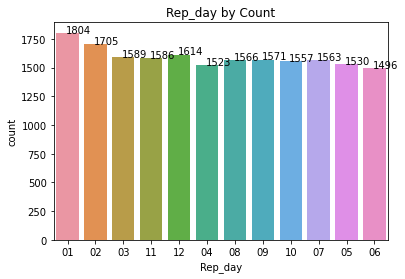

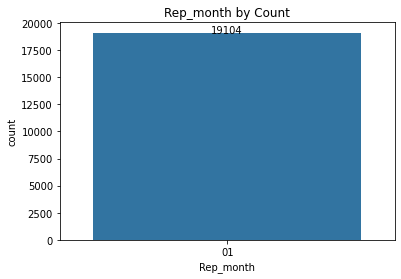

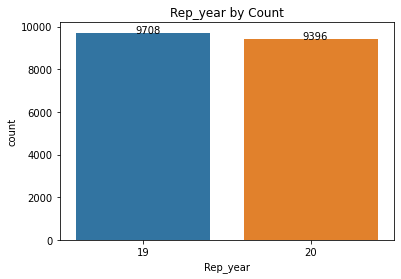

In [49]:
# Count plot of attributes
for col in subset_df.columns:
  ax = sns.countplot(data=subset_df, x=col)
  plt.title(f"{col} by Count")
  for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.35, p.get_height()+0.05))
  plt.show()
  print()


#### **Observation**: 
*   *Age 18 & 19 have more patients and the rest of the ages have equal distribution*
*   *Interestingly Non-Smoker patients count is more than the Smokers count*
*   *Southeast region has more patients and the rest of the regions have equal distribution*
*   *Good to see less number of patients with 'Severity Level' high*

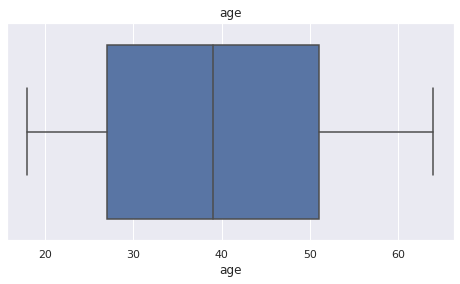

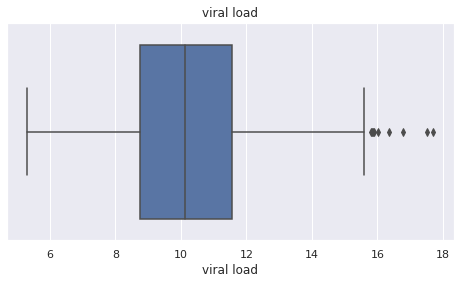

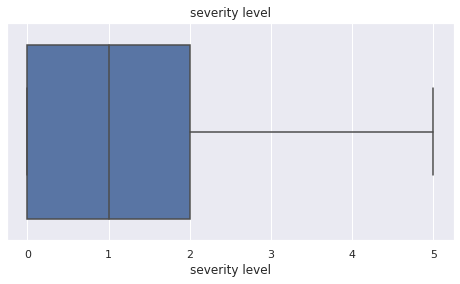

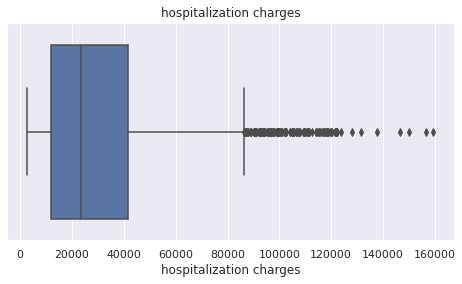

In [ ]:
sns.set_theme(style='darkgrid')
sns.set(rc = {'figure.figsize':(8,4)})

for col in num_features:
  p = sns.boxplot(data=work_df,x=col)
  p.set(title=f'{col}')
  plt.show()

#### **Observation**: *The above charts indicate, we have outliers for 'viral load' and 'hospitalization charges'*

In [ ]:
def outlierAnalysis(x):
  Q3, Q1 = np.percentile(work_df[x], [75 ,25])
  IQR = Q3 - Q1
  maxExcludingOutlier = Q3 + 1.5 * IQR
  minExcludingOutlier = Q1 - 1.5 * IQR
  mean = round(work_df[x].mean(),2)
  median = round(work_df[x].median(),2)
  mode = round(work_df[x].mode(), 2)
  print("For the given sample" +x +"Analysis is as Follows: ")
  print("Q1: ", Q1)
  print("Q3: ", Q3)
  print("Mean: ", round(work_df[x].mean(),2))
  print("Median: ", work_df[x].median())
  print("Mode: " , round(work_df[x].mode(), 2))
  print("IQR: " , IQR)
  print("Maximum " + x +" Excluding Outlier: " , maxExcludingOutlier) 
  print("Minimum " + x + " Purchase Excluding Outlier: " , minExcludingOutlier)

In [ ]:
# outlier analysis of 'viral load'
outlierAnalysis('viral load')

For the given sampleviral loadAnalysis is as Follows: 
Q1:  8.7625
Q3:  11.5675
Mean:  10.22
Median:  10.13
Mode:  0     9.63
1    10.77
dtype: float64
IQR:  2.8050000000000015
Maximum viral load Excluding Outlier:  15.775000000000002
Minimum viral load Purchase Excluding Outlier:  4.554999999999997


In [ ]:
# outlier analysis of 'hospitalization charges'
outlierAnalysis('hospitalization charges')

For the given samplehospitalization chargesAnalysis is as Follows: 
Q1:  11851.0
Q3:  41599.5
Mean:  33176.06
Median:  23455.0
Mode:  0      4055
1      4080
2      4099
3      4319
4      4593
5      5509
6      5544
7      6773
8     11799
9     16501
10    20836
11    23618
12    26486
13    26504
14    33677
15    35003
16    35986
17    62288
dtype: int64
IQR:  29748.5
Maximum hospitalization charges Excluding Outlier:  86222.25
Minimum hospitalization charges Purchase Excluding Outlier:  -32771.75


#### Outlier Treatment

In [ ]:
# Remove the columns from the Numerical Features list where we don't have any outliers
num_features.remove('age')
num_features.remove('severity level')

In [ ]:
# Treat outliers for the numerical features where outliiers present
for i, j in enumerate(num_features):
  q1 = work_df[j].quantile(0.25)
  q3 = work_df[j].quantile(0.75)
  iqr = q3 - q1
  work_df = work_df[(work_df[j] >=  q1 - 1.5*iqr) & (work_df[j] <= q3 + 1.5*iqr)]

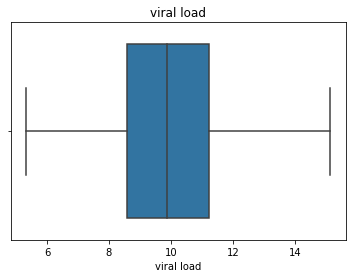

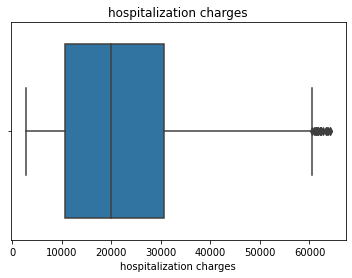

In [ ]:
# Plots post outlier treatment
for col in num_features:
  p = sns.boxplot(data=work_df,x=col)
  p.set(title=f'{col}')
  plt.show()

#### Bivariate Analysis

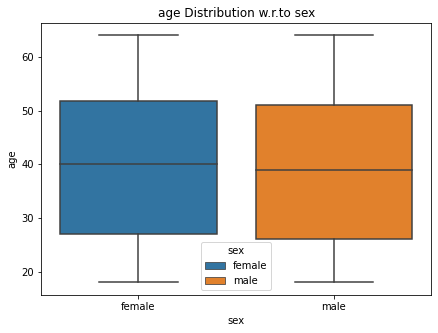

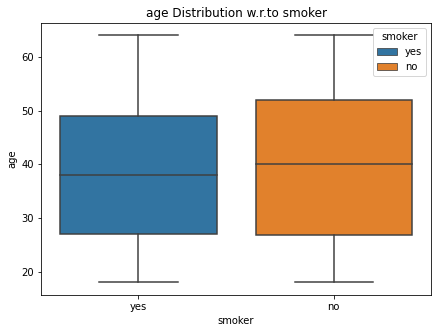

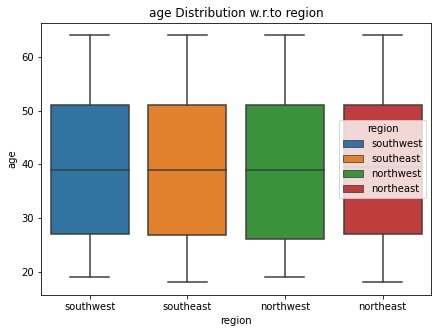

In [ ]:
# Bi-variate analysis of Categorical Features
variable = "age"
for i in cat_features:
 plt.figure(figsize = (7,5))
 sns.boxplot(x=i, hue=i, y=variable, data=work_df, dodge=False)
 plt.title(variable + " Distribution w.r.to " + i)
 plt.show()

#### **Observation**: 
*   *Most of the patients are seem to be b/w the ages 28 to 52 and equally distributed b/w both the gender*
*   *Similarly irrespective of smoking habit, the patients seem to be highly distributed b/w 28 and 50 ages*
*   *Similar distribution observed across the regions*



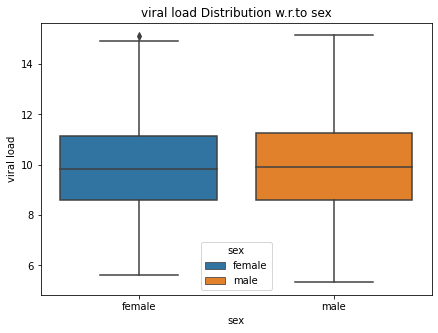

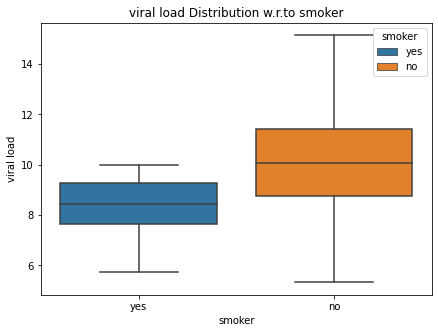

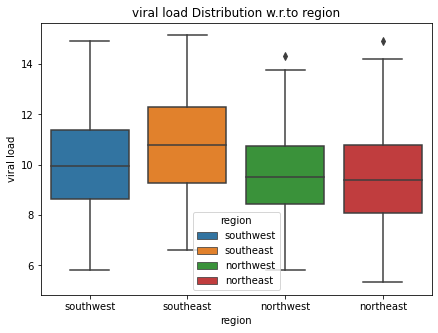

In [ ]:
variable = "viral load"
for i in cat_features:
 plt.figure(figsize = (7,5))
 sns.boxplot(x=i, hue=i, y=variable, data=work_df, dodge=False)
 plt.title(variable + " Distribution w.r.to " + i)
 plt.show()

#### **Observation**: 
*   *Female patients seems to be little more vulnerable to viral load than Male patients*
*   *Incidently non-smokers tend to have high viral load than smokers*
*   *Amongst the regions, Southeast is impacted with high viral load than other regions*



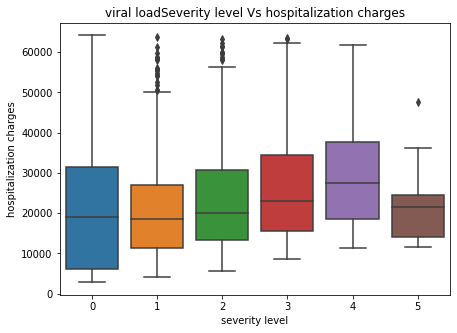

In [ ]:
# Impact of Severity Level on Hospitalization Charges
plt.figure(figsize = (7,5))
sns.boxplot(x='severity level', y='hospitalization charges', data=work_df, dodge=False)
plt.title(variable + "Severity level Vs hospitalization charges")
plt.show()

#### **Observation**: 
*   *Severity Levels 0, 3 and 4 seem to have higher hospitalization charges*



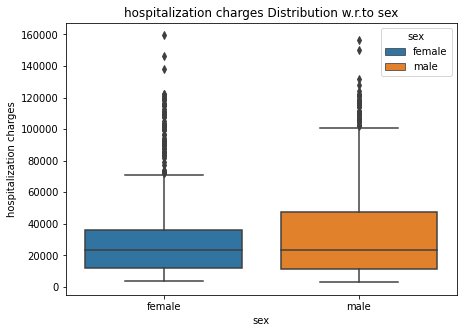

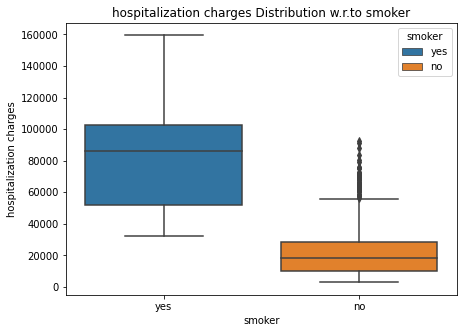

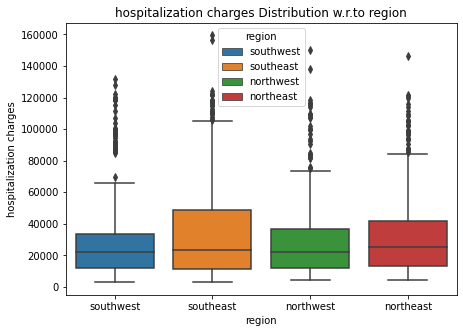

In [ ]:
variable = "hospitalization charges"
for i in cat_features:
 plt.figure(figsize = (7,5))
 sns.boxplot(x=i, hue=i, y=variable, data=work_df, dodge=False)
 plt.title(variable + " Distribution w.r.to " + i)
 plt.show()

#### **Observation**: In terms of hospitalization charges, 
*   *Male patients tend to incur high charges*
*   *Evidently Smokers are paying more than the non-smokers*
*   *Southeast region has higher hospitalization charges amongst regions*



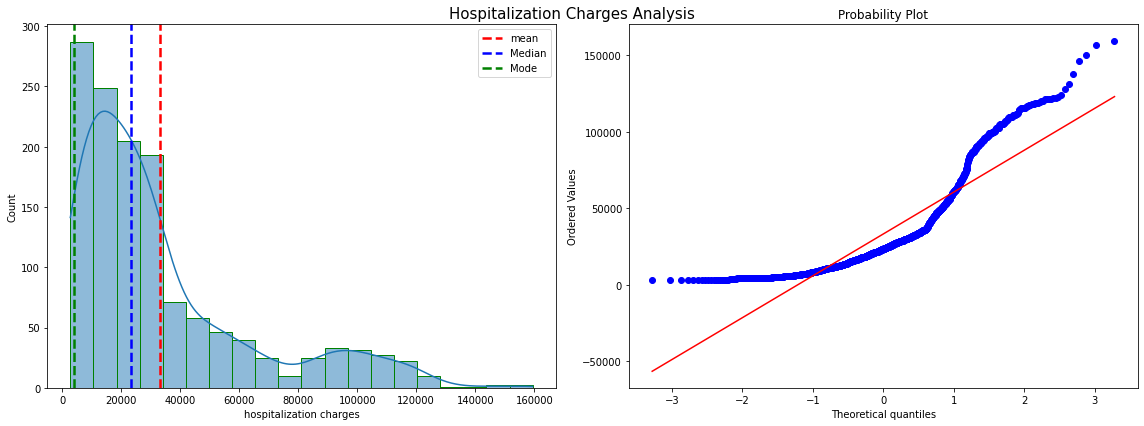

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6), squeeze=False)
plt.suptitle("Hospitalization Charges Analysis", fontsize = 15)
g1 = sns.histplot(work_df['hospitalization charges'], kde = True, edgecolor='green', ax = axs[0, 0], bins = 20) 
g1.axvline(work_df['hospitalization charges'].mean(), ls = '--', color = "red", lw = 2.5, label = "mean") 
g1.axvline(work_df['hospitalization charges'].median(), ls = '--' ,color = 'blue', lw = 2.5, label = 'Median') 
g1.axvline(work_df['hospitalization charges'].mode()[0], ls = '--', color = 'green', lw = 2.5, label = 'Mode') 
g1.legend()
stats.probplot(work_df['hospitalization charges'], dist="norm", plot=axs[0, 1])
plt.tight_layout()
plt.show()

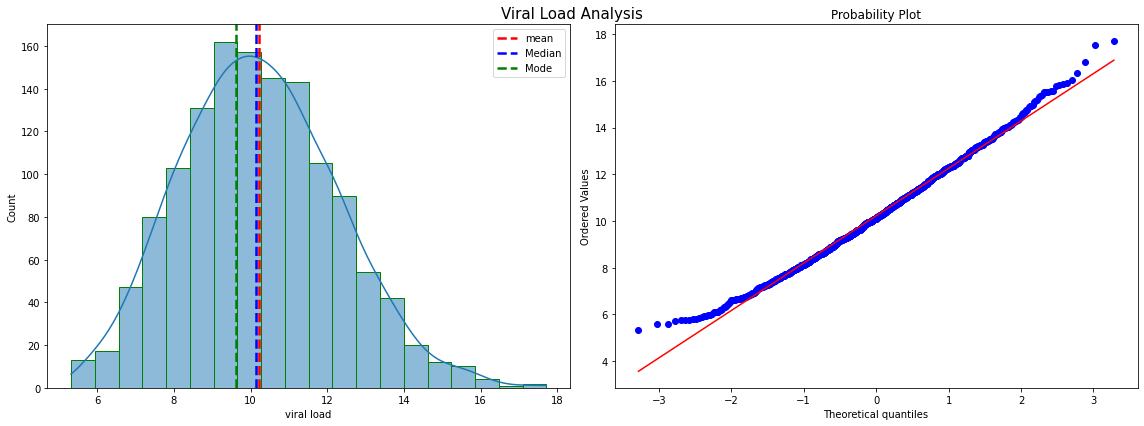

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6), squeeze=False)
plt.suptitle("Viral Load Analysis", fontsize = 15)
g1 = sns.histplot(work_df['viral load'], kde = True, edgecolor='green', ax = axs[0, 0], bins = 20) 
g1.axvline(work_df['viral load'].mean(), ls = '--', color = "red", lw = 2.5, label = "mean") 
g1.axvline(work_df['viral load'].median(), ls = '--' ,color = 'blue', lw = 2.5, label = 'Median') 
g1.axvline(work_df['viral load'].mode()[0], ls = '--', color = 'green', lw = 2.5, label = 'Mode') 
g1.legend()
stats.probplot(work_df['viral load'], dist="norm", plot=axs[0, 1])
plt.tight_layout()
plt.show()

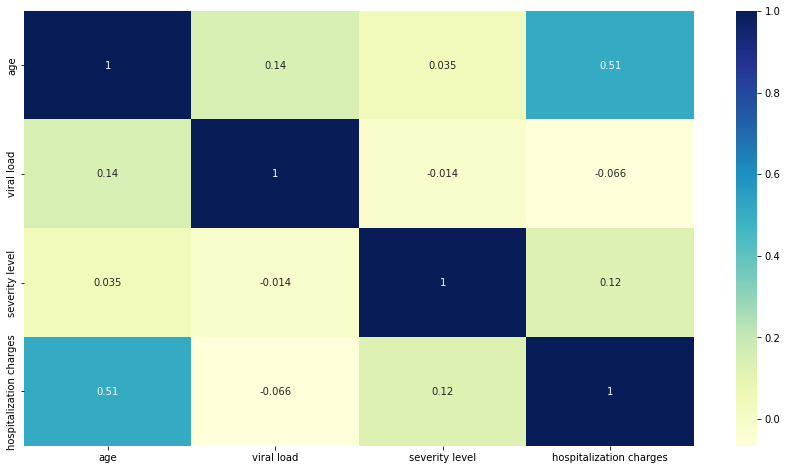

In [ ]:
# Check for Correlation
plt.figure(figsize=(15,8))
sns.heatmap(work_df.corr(), annot=True, cmap='YlGnBu')
plt.show()

#### **Observation**: *Notably, there is a high correlatioin b/w Age & Hospitalization Charges*

In [ ]:
work_df['age_bins'] = pd.cut(x=work_df['age'], bins = [0, 18, 35, 50, 70, 100], labels = ['0-18', '18-35', '35-50', '50-70', '70-100'])
work_df.head()

,age,sex,smoker,region,viral load,severity level,hospitalization charges,age_bins
0,19,female,yes,southwest,9.30,0,42212,18-35
1,18,male,no,southeast,11.26,1,4314,0-18
2,28,male,no,southeast,11.00,3,11124,18-35
3,33,male,no,northwest,7.57,0,54961,18-35
4,32,male,no,northwest,9.63,0,9667,18-35


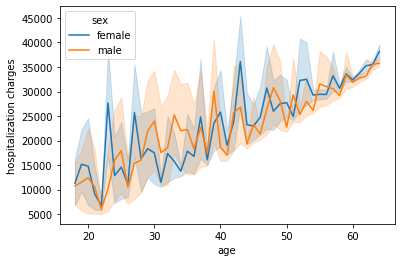

In [ ]:
sns.lineplot(x='age', y='hospitalization charges', data=work_df, hue='sex')

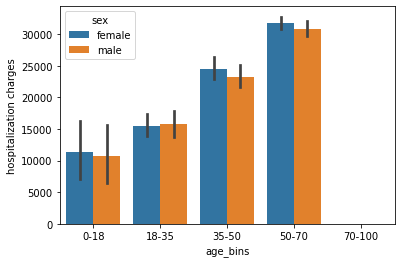

In [ ]:
sns.barplot(x='age_bins', y='hospitalization charges', data=work_df, hue='sex')

#### **Observation**: *It is evident from the above graphs that hospitalization charges increase with the age and that too in women segment*

In [ ]:
work_df.groupby(['region', 'sex', 'smoker']).mean()['hospitalization charges'].unstack()

smoker                      no           yes
region    sex                               
northeast female  22013.256000  46492.823529
          male    19633.533333  46155.153846
northwest female  20019.523077  48740.166667
          male    18420.714286  48740.666667
southeast female  18421.461538  49618.000000
          male    17718.819672  48649.357143
southwest female  18842.235294  45495.000000
          male    18778.569106  48505.833333

In [ ]:
# Hospitalization charges max by region by sex and by smoking habit
hosp_charge_max_by_region = work_df.groupby(['region', 'sex', 'smoker']).max()['hospitalization charges'].sort_values().unstack()
hosp_charge_max_by_region

smoker               no    yes
region    sex                 
northeast female  58222  60267
          male    58104  56155
northwest female  60149  59719
          male    56234  59918
southeast female  55481  60452
          male    58908  55545
southwest female  50444  56196
          male    57707  58921

In [ ]:
# Hospitalization charges min by region by sex and by smoking habit
hosp_charge_min_by_region = work_df.groupby(['region', 'sex', 'smoker']).min()['hospitalization charges'].sort_values().unstack()
hosp_charge_min_by_region

smoker              no    yes
region    sex                
northeast female  5491  35709
          male    4237  32074
northwest female  5293  36779
          male    4053  39545
southeast female  4019  41444
          male    2805  42608
southwest female  4319  34611
          male    3104  39552

### Hypothesis Testing

#### Prove (or disprove) that the hospitalization of people who do smoking is greater than those who don't? (T-test Right tailed)

In [ ]:
# Hypothesis 1 - Hospitalization of people who are smokers is greater than the non-smokers
work_df.groupby('smoker')['hospitalization charges'].describe()

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
no,1012.0,19229.271739,11641.575233,2805.0,9692.0,17880.0,27420.75,60149.0
yes,99.0,47808.929293,6808.260660,32074.0,42830.0,47769.0,53103.50,60452.0


##### 

Null Hypothesis :  Mean Hospitalization charges of Smokers (m1) <= the Mean Hospitalization charges of nonsmokers (m2)

Alternate Hypothesis: m1 > m2 (The average hospitalization charges of smokers is greater than that of nonsmokers)

Decide the significance level. If P values is less than alpha, then 'fail to accept' the null hypothesis.

Let's do a T-stat test. The > sign in alternate hypothesis indicate test is right tailed, which means all z values that would reject null hypothesis are in just one tail to the right of sampling distribution curve.

In [ ]:
# Mean value of Smokers and their hospitalization charges from a random sample
smoker_sample = df[df['smoker']=='yes']['hospitalization charges'].sample(200)
m1 = smoker_sample.mean()
m1

79681.65

In [ ]:
# Mean value of Non-smokers and their hospitalization charges from a random sample
non_smoker_sample = df[df['smoker']=='no']['hospitalization charges'].sample(200)
m2 = non_smoker_sample.mean()
m2

18982.11

In [ ]:
# If mean1 is > mean2 then alternate value is 'greater' else it is 'less' else if mean1 equal to mean2 then the value is 'two-sided'
alpha = 0.05
alt_val = ["greater" if m1>m2 else 'two-sided' if m1==m2 else "less"]
t_stat, p_val = stats.ttest_ind(smoker_sample, non_smoker_sample, equal_var=False, alternative=alt_val[0])
print("Test Statistic = {}, P-Value = {}, One Tail P-Value = {}".format(t_stat, p_val, p_val_onetail))
if p_val > alpha:
  print("We fail to reject the null hypothesis")
else:
  print("We fail to accept the null hypothesis")

Test Statistic = 27.088426845510426, P-Value = 2.149878888748719e-81, One Tail P-Value = 1.0749394443743594e-81
We fail to accept the null hypothesis


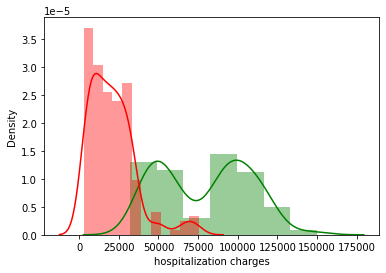

In [ ]:
sns.distplot(smoker_sample, color='green')
sns.distplot(non_smoker_sample, color='red')

#### Prove (or disprove) with statistical evidence that the viral load of females is different from that of males (T-test Two tailed)

##### 

Null Hypothesis : the viral load of females is different from that of males

Alternate Hypothesis: the viral load of females is not different from that of males

Decide the significance level. If P values is less than alpha, then 'fail to accept' the null hypothesis.

In [ ]:
work_df.groupby('sex')['viral load'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
female,569.0,9.952285,1.944578,5.60,8.58,9.860,11.1800,15.11
male,542.0,10.003653,1.931349,5.32,8.58,9.935,11.2975,15.14


In [ ]:
male_sample = work_df[work_df['sex']=='male']['viral load'].sample(500)
male_mean = male_sample.mean()
male_mean

10.339899999999998

In [ ]:
female_sample = work_df[work_df['sex']=='female']['viral load'].sample(500)
fem_mean = female_sample.mean()
fem_mean

10.04166

In [ ]:
# As the means of both the samples of male and female, let's do 'two-sided'.
alpha = 0.05
t_stat, p_val = stats.ttest_ind(male_sample, female_sample)
print("Test Statistic = {}, P-Value = {}".format(t_stat, p_val))
if p_val > alpha:
  print("We fail to reject the null hypothesis")
else:
  print("We fail to accept the null hypothesis")

Test Statistic = 2.297856074924988, P-Value = 0.021776091551530378
We fail to accept the null hypothesis


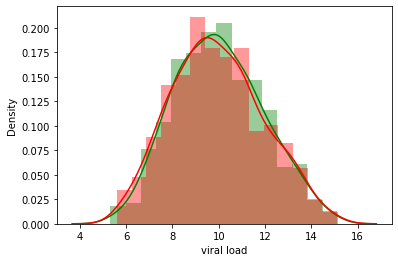

In [ ]:
sns.distplot(male_sample, color='green')
sns.distplot(female_sample, color='red')

#### **Observation**: *We fail to reject the Null hypothesis, which means gender doesn't have much effect on Viral load*

### Chi-Squared Test

#### Is the proportion of smoking significantly different across different regions? (Chi-square)

Both Smoker and Region are categorical variables

#####

Null Hypothesis : Smokers proportions is same across all regions

Alternate Hypothesis: Smokers proportions is different across different regions

If P values is less than alpha, then 'fail to accept' the null hypothesis.

In [ ]:
contingency = pd.crosstab(work_df.region, work_df.smoker)
contingency

smoker,no,yes
region,,
northeast,257,67
northwest,267,58
southeast,273,91
southwest,267,58


In [ ]:
chi2, p_val, dof, exp_freq = chi2_contingency(contingency, correction=False)
print("Chi Square Statistic: {}, P-Value: {}, Degree of Freedom: {}, Expected Frequency: {}".format(chi2, p_val, dof, exp_freq))
if p_val > alpha:
  print("We fail to reject the null hypothesis")
else:
  print("We fail to accept the null hypothesis")

Chi Square Statistic: 7.343477761407071, P-Value: 0.06171954839170541, Degree of Freedom: 3, Expected Frequency: [[257.65022422  66.34977578]
 [258.44544096  66.55455904]
 [289.45889387  74.54110613]
 [258.44544096  66.55455904]]
We fail to reject the null hypothesis


### ANOVA Test

#### Is the mean viral load of women with 0 Severity level , 1 Severity level, and 2 Severity level the same? Explain your answer with statistical evidence (One way Anova)

#####

Null Hypothesis : The mean viral load of women with no severity level μ1, one severity level μ2 and two severity level μ3 are the same.  

Alternate Hypothesis: μ1 or μ2 or μ3 may not be same.

If P values is less than alpha, then 'fail to accept' the null hypothesis.

In [ ]:
work_df[work_df['sex']=='female'].groupby('severity level')['viral load'].describe().head()

,count,mean,std,min,25%,50%,75%,max
severity level,,,,,,,,
0,249.0,10.016426,1.962150,5.76,8.6300,9.870,11.3000,14.92
1,138.0,9.822609,1.854912,5.60,8.5850,9.655,11.0100,15.11
2,98.0,9.879184,2.012418,5.73,8.2550,10.010,11.1650,14.45
3,68.0,10.042353,1.968850,6.33,8.6075,10.035,11.3175,14.90
4,9.0,10.681111,1.906321,8.53,9.6000,9.770,11.2300,13.82


In [ ]:
# female_severity_df = work_df[work_df['sex']=='female'].loc[work_df[work_df['sex']=='female']['severity level']<=2]
female_severity_df = work_df[work_df['sex']=='female'].loc[work_df[work_df['sex']=='female']['severity level']<=2]
female_severity_df.head()

,age,sex,smoker,region,viral load,severity level,hospitalization charges
0,19,female,yes,southwest,9.30,0,42212
5,31,female,no,southeast,8.58,0,9392
6,46,female,no,southeast,11.15,1,20601
9,60,female,no,northwest,8.61,0,72308
11,62,female,yes,southeast,8.76,0,69522


In [ ]:
# Shapiro-Wilk’s test - Let's test null hypothesis: viral load follows normal distribution against the alternative hypothesis: viral load doesn't follow normal distribution
w, p_val = shapiro(female_severity_df['viral load'])
print("P-Value is: ", p_val)
if p_val > alpha:
  print("We fail to reject the null hypothesis")
else:
  print("We fail to accept the null hypothesis")

P-Value is:  0.011093495413661003
We fail to accept the null hypothesis


#### **Observation**: *Null hypothesis fails, which means it doesn't follow normal distribution. This can be validated by EDA as follows*

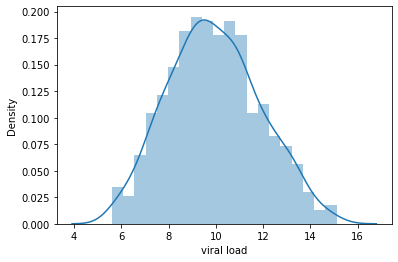

In [ ]:
sns.distplot(female_severity_df['viral load'], bins=20)

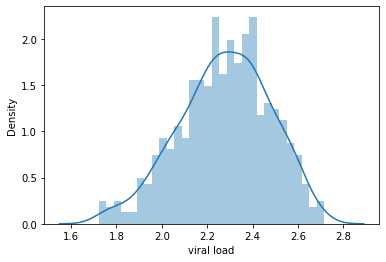

In [ ]:
sns.distplot(np.log(female_severity_df['viral load']), bins=30)

In [ ]:
# For the same above Ho and H1, let's do a log normal test and check the p-value. 
w, p_val = shapiro(np.log(female_severity_df['viral load']))
print('P-Value is: ', p_val)
if p_val > alpha:
  print("We fail to reject the null hypothesis")
else:
  print("We fail to accept the null hypothesis")

P-Value is:  0.006363806780427694
We fail to accept the null hypothesis


#### **Observation**: *Even the log normal test fails the Ho, which means the distribution is not normal*

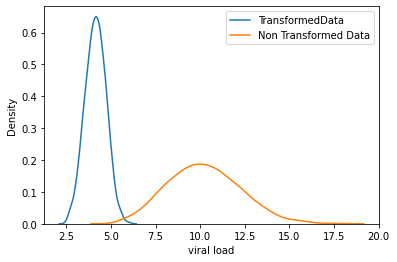

In [ ]:
transformed_data, best_lambda = stats.boxcox(work_df['viral load']) 
sns.distplot(transformed_data, hist=False, kde=True, label = "TransformedData") 
sns.distplot(work_df['viral load'], hist=False, kde=True, label = "Non Transformed Data") 
plt.legend()
plt.show()

In [ ]:
tstat, p_val = stats.shapiro(transformed_data)
print('P-Value is: ', p_val)
if p_val > alpha:
  print("We fail to reject the null hypothesis")
else:
  print("We fail to accept the null hypothesis")

P-Value is:  0.34881141781806946
We fail to reject the null hypothesis


#### **Observation**: *Boxcox transformation technique for viral load indicates p-value > alpha. So distribution is Normal on transformed data*

#### Levene’s test

Null hypothesis : All the viral load variances are equal

Alternative hypothesis : At least one variance is different from the rest.

In [ ]:
# Levene's test
statistics, p_val = levene(female_severity_df[female_severity_df['severity level']==0]['viral load'].sample(100), 
                           female_severity_df[female_severity_df['severity level']==1]['viral load'].sample(100),
                           female_severity_df[female_severity_df['severity level']==2]['viral load'].sample(100, replace=True))
print('P-Value is: ', p_val)
if p_val > alpha:
  print("We fail to reject the null hypothesis")
else:
  print("We fail to accept the null hypothesis")

P-Value is:  0.1716618340538876
We fail to reject the null hypothesis


In [ ]:
test_stat, p_val = f_oneway(female_severity_df[female_severity_df['severity level']==0]['viral load'].sample(100), 
                            female_severity_df[female_severity_df['severity level']==1]['viral load'].sample(100),
                            female_severity_df[female_severity_df['severity level']==2]['viral load'].sample(100, replace=True))
print('P-Value is: ', p_val)
if p_val > alpha:
  print("We fail to reject the null hypothesis")
else:
  print("We fail to accept the null hypothesis")

P-Value is:  0.31898469765817655
We fail to reject the null hypothesis


#### **Observation**: *P-Value is high, thus Null Hypothesis is true, indicating Means are equal for all severity levels.*

# Observations & Insights



*   There is no missing or duplicate value in the given dataset
*   Age 18 & 19 have more patients and the rest of the ages have equal distribution
*   Interestingly Non-Smoker patients count is more than the Smokers count
*   Southeast region has more patients and the rest of the regions have equal distribution
*   Good to see less number of patients with 'Severity Level' high
*   There are outliers in 'viral load' and 'hospitalization charges' columns
*   There is a high correlatioin b/w Age & Hospitalization Charges. As the age increases, hospitalization charges also increases
*   Also, hospitalization seem to increase with the age, and more specifically for women   
*   Female patients seems to be little more vulnerable to viral load than Male patients
*   Incidently non-smokers tend to have high viral load than smokers
*   Amongst regions, Southeast is impacted high viral load than other regions
*   Male patients tend to incur high charges
*   Evidently Smokers are paying more than the non-smokers
*   Southeast region has higher hospitalization charges amongst regions
*   Hospitalization charges increase with age and that too in women segment

**Observations from Hypothesis Testing:**

*   Hospitalization Charges for smokers is higher than for non-smokers
*   Viral Load in Females is more compared to Males
*   Proportion of smoking is almost similar across the regions
*   Viral Load of women with Severity levels - 0,1,2 are more or less same




# Recommendations

Based on the above observations and insights, some of the recommendations to consider are: 
*   It is alarming to see high number of patients at lower age group 18-20. It's high time to role out stable nutrition programs for children & teens.
*   Notably Southeast region is impacted with high viral load and increased hospitalization charges. Special attention needs to be given in this region
*   As age has direct proportion to the increased hospitalization charges, Apollo can come up with targeted healthcare policy & programs for higher age groups
*   Female gender group requires specific, focused attention 
*   Special medi-claim policy can be launced for Smokers 